In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

In [2]:
shop = yf.Ticker("SHOP.TO")
shop_df = shop.history(period='max')
shop_df = shop_df.drop(columns=["Dividends", "Stock Splits"])
shop_df = shop_df.loc['2015':'2021']
shop_df = shop_df.dropna()
shop_df["Target Close"] = shop_df['Close'].shift(periods=-1)
shop_df.rename(columns = {"Close": "Shop Close"},  inplace = True)
shop_df.head()

,Open,High,Low,Shop Close,Volume,Target Close
Date,,,,,,
2015-05-21,35.029999,35.299999,30.000000,31.250000,270300,34.939999
2015-05-22,32.029999,38.029999,32.000000,34.939999,322800,37.259998
2015-05-25,35.000000,37.470001,35.000000,37.259998,117800,36.919998
2015-05-26,36.000000,37.689999,36.000000,36.919998,96800,34.500000
2015-05-27,38.000000,38.160000,33.630001,34.500000,135700,34.000000


In [3]:
vix = yf.Ticker("^VIX")
vix_df = vix.history(period='max')
vix_df = pd.DataFrame(vix_df["Close"])
vix_df = vix_df.loc['2015':'2021']
vix_df = vix_df.dropna()
vix_df.rename(columns = {"Close": "Vix Close"},  inplace = True)
vix_df.head()

,Vix Close
Date,
2015-01-02,17.790001
2015-01-05,19.920000
2015-01-06,21.120001
2015-01-07,19.309999
2015-01-08,17.010000


In [4]:
crm = yf.Ticker("CRM")
crm_df = crm.history(period='max')
crm_df = pd.DataFrame(crm_df["Close"])
crm_df = crm_df.loc['2015':'2021']
crm_df = crm_df.dropna()
crm_df.rename(columns = {"Close": "CRM Close"},  inplace = True)
crm_df.head()

,CRM Close
Date,
2015-01-02,59.240002
2015-01-05,58.169998
2015-01-06,57.200001
2015-01-07,56.930000
2015-01-08,58.590000


In [5]:
cad = yf.Ticker("CAD=X")
cad_df = cad.history(period='max')
cad_df = pd.DataFrame(cad_df["Close"])
cad_df = cad_df.loc['2010':'2021']
cad_df = cad_df.dropna()
cad_df.rename(columns = {"Close": "CAD Close"},  inplace = True)
cad_df.head()

,CAD Close
Date,
2010-01-01,1.0512
2010-01-04,1.0410
2010-01-05,1.0395
2010-01-06,1.0319
2010-01-07,1.0340


In [6]:
tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2021']
tsx_df = tsx_df.dropna()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df.head()

,TSX Close
Date,
2010-01-04,11866.900391
2010-01-05,11888.099609
2010-01-06,11944.500000
2010-01-07,11887.500000
2010-01-08,11953.799805


In [7]:
shopmodel_df = pd.concat([shop_df, vix_df, crm_df, cad_df, tsx_df], axis=1, join="inner")
shopmodel_df = shopmodel_df.dropna()

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

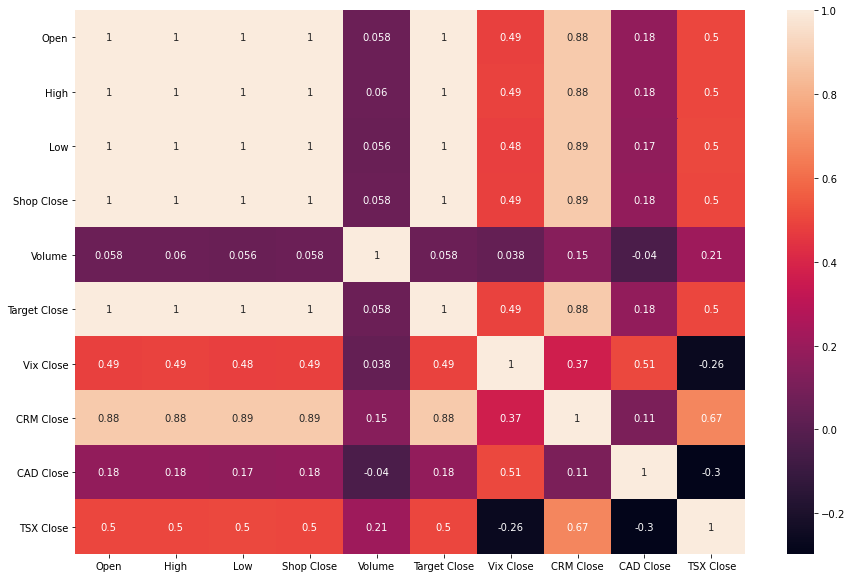

In [9]:
corrmat = shopmodel_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()

In [10]:
shop_df = shopmodel_df[["Open", "High", "Low", "Volume", "Vix Close", "CRM Close", "CAD Close", "TSX Close", "Shop Close"]]
shop_df

,Open,High,Low,Volume,Vix Close,CRM Close,CAD Close,TSX Close,Shop Close
Date,,,,,,,,,
2015-05-21,35.029999,35.299999,30.000000,270300,12.11,72.910004,1.22064,15203.599609,31.250000
2015-05-22,32.029999,38.029999,32.000000,322800,12.13,75.010002,1.21960,15200.799805,34.939999
2015-05-26,36.000000,37.689999,36.000000,96800,14.06,73.570000,1.23193,15050.799805,36.919998
2015-05-27,38.000000,38.160000,33.630001,135700,13.27,73.949997,1.24244,15110.500000,34.500000
2015-05-28,34.599998,34.599998,33.139999,38400,13.31,72.680000,1.24540,15107.000000,34.000000
...,...,...,...,...,...,...,...,...,...
2021-01-14,1560.209961,1560.219971,1479.430054,231400,23.25,215.600006,1.26981,17958.099609,1488.680054
2021-01-15,1505.380005,1517.150024,1465.160034,99000,24.34,213.139999,1.26477,17909.000000,1490.949951
2021-01-19,1511.839966,1516.280029,1464.000000,159700,23.24,216.759995,1.27480,17957.400391,1494.390015


In [11]:
shop_df.Volume = shop_df.Volume.astype(float) 
shop_df.dtypes

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Open          float64
High          float64
Low           float64
Volume        float64
Vix Close     float64
CRM Close     float64
CAD Close     float64
TSX Close     float64
Shop Close    float64
dtype: object

In [12]:
shop_csv_data = shop_df.to_csv('shop.csv', index = True) 